### **Tarea Semana 13: Simulación Metrópolis-Monte Carlo Modelo de Icing en 1D**
#### IF4702 - Física Computacional I 
#### Grupo 1, primer semestre 2022
<p> ----------------------------------------------------------------------------------------
<p> Valeria Bonilla Rojas (carné: 2018254434)
<p> María Fernanda Quesada Mena (carné: 2020036474)


In [4]:
# Importación de librerías
import numpy as np
import matplotlib.pyplot as plt
import random 

#### **1.1. Simulación del modelo de Icing**

In [ ]:
# Definir funciones

def CambiosEspines(arregloEspines):
  # Guardar el estado inicial de cada espin
  estadoInicial = arregloEspines

  # Crear un arreglo de estados para cada paso
  arregloEstados = []

  for i in range(nPasos):

    # Calcular la energia del sistema de espines
    sumatoria = 0
    for j in range(len(estadoInicial)-1):
      if j + 1 == len(estadoInicial):
        sumatoria += estadoInicial[j]*estadoInicial[0]
      else:
        sumatoria += estadoInicial[j]*estadoInicial[j+1]

    energiaInicial = -J*sumatoria

    # Escoger un espin aleatoriamente al cual cambiarle la direccion
    kEspin = int(np.random.uniform(0,nEspines-1))

    # Crear una arreglo que represente el nuevo estado propuesto
    nuevoEstado = np.copy(estadoInicial)

    # Cambiar la direccion del espín seleccionado
    nuevoEstado[kEspin] = -nuevoEstado[kEspin]

    # Calcular la energia del nuevo sistema una vez cambiada la dirección del espin
    sumatoriaNueva = 0
    for k in range(len(nuevoEstado)-1):
      if j + 1 == len(estadoInicial):
        sumatoriaNueva += nuevoEstado[j]*nuevoEstado[0]
      else:
        sumatoriaNueva += nuevoEstado[k]*nuevoEstado[k+1]

    energiaNueva = -J*sumatoriaNueva

    # Calcular el cambio de energía
    deltaE = energiaNueva-energiaInicial

    # Calcular la probabilidad de aceptacion
    beta = 1/k_BT

    if energiaNueva <= energiaInicial:
      probabilidad = 1
    else:
      probabilidad = np.exp(-beta*deltaE)

    # Aceptar o rechazar la transición
    if np.random.random() < probabilidad:
      estadoInicial = nuevoEstado

    arregloEstados.append(estadoInicial)

  arregloEstados = np.array(arregloEstados)
  Estados = plt.imshow(arregloEstados.transpose(), cmap=plt.cm.tab20)
  ax = plt.gca()
  ax.set_xlabel("nPasos")
  ax.set_ylabel("nEspines")
  ax.set_aspect(0.65*nPasos/nEspines)
  plt.show()

  return

#### Configuración inicial ordenada: Espines Arriba 


In [ ]:
# Parámetros de la simulación 
J = 1 
k_BT = 1
nEspines = 100
nPasos = 1000

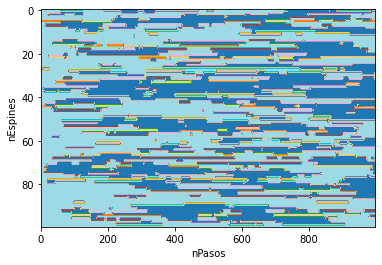

In [ ]:
# Arreglo para almacenar los espines
arregloEspinesArriba = 0.5*np.ones(nEspines)
CambiosEspines(arregloEspinesArriba)

#### Configuración inicial ordenada: Espines Abajo

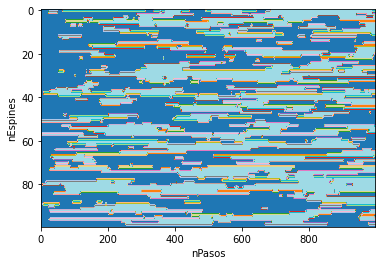

In [ ]:
# Arreglo para almacenar los espines
arregloEspinesAbajo = -0.5*np.ones(nEspines)
CambiosEspines(arregloEspinesAbajo)

#### Configuración inicial desordenada

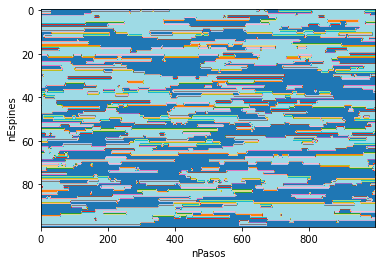

In [ ]:
# Arreglo para almacenar los espines
arregloEspinesDesordenados = np.random.random(nEspines)

# Definir la alineacion de cada espin  
for i in range(len(arregloEspinesDesordenados)):
  if arregloEspinesDesordenados[i] <= 0.5:
    arregloEspinesDesordenados[i] = -0.5
  if arregloEspinesDesordenados[i] > 0.5:
    arregloEspinesDesordenados[i] = 0.5 

CambiosEspines(arregloEspinesDesordenados)

#### **1.2. Propiedades termodinámicas del modelo de Ising**

In [5]:
# Parámetros de la simulación 
J = 1
kb = 1
nEspines = 100
nPasos  = 1000


#Se definen las 3 funciones iniciales, que realizan los cálculos básicos de la orientación, magnetización, y energía

#Se define una función que genera la orientación respectiva para el espín
def OrientaciónEspin (nEspines, orientacion):
    if orientacion == 1:
        GrupoEspines = np.ones (nEspines)
    elif orientacion == -1:
        GrupoEspines = []
        for i in range (nEspines):  
            GrupoEspines.append (-1)
    else:
        GrupoEspines = []
        for i in range (nEspines):  
            orientación = random.randint (0,1)
            if orientación == 0:
                GrupoEspines.append (1)
            else:
                GrupoEspines.append (-1)
    
    return GrupoEspines

#Se define la función que calcula la energía
def CalculoEnergia (GrupoEspines):
    energia = 0
    for i in range (nEspines-1):
        energia += -J * GrupoEspines[i] * GrupoEspines[i+1]    
    
    return energia

#Se define la función que calcula la magnetización
def CalculoMagnetizacion (GrupoEspines):
    magnetizacion = 0
    for i in range (nEspines):
        magnetizacion += GrupoEspines[i]
    
    return magnetizacion   


def CambiosEspines (GrupoEspines, temperatura):
    # Se realiza el cálculo inicial para la energía y magnetización, y se toma un espín aleatorio para realizarle el cambio
    energia = CalculoEnergia (GrupoEspines)
    magnetizacion = CalculoMagnetizacion (GrupoEspines)
    espinAleatorio = random.randint (0, nEspines-1)

    # Se modifica el grupo de espines con la alteración del espín aleatorio
    GrupoEspines [espinAleatorio] = GrupoEspines [espinAleatorio] * -1
    
    # Con el espín modificado, se calcula de nuevo la energía y magnetización
    nuevaEnergia = CalculoEnergia (GrupoEspines)
    nuevaMagnetizacion = CalculoMagnetizacion (GrupoEspines)
    cambioEnergia = nuevaEnergia - energia

    # Calcular la probabilidad de aceptacion, para así aceptar o rechazar la transición
    if nuevaEnergia > energia:
        probabilidad = np.exp (-cambioEnergia/(kb*temperatura))
        if random.random () < probabilidad:   
            energia = nuevaEnergia
            magnetizacion = nuevaMagnetizacion
                
        else:
            GrupoEspines [espinAleatorio] = GrupoEspines [espinAleatorio] * -1

    else: 
        energia = nuevaEnergia
        magnetizacion = nuevaMagnetizacion

    return energia, GrupoEspines, magnetizacion   


def MetodoIsing (valorTemp, orientacion):    
    # Se obtienen los valores inciales de los espines
    GrupoEspines = OrientaciónEspin (nEspines, orientacion)

    # Se crean los arreglos que van a almacenar la evolución de la energía, magnetización, energía interna y energía interna al cuadrado
    puntoEquilibrio = 200
    evolucionEnergia = np.zeros (nPasos)
    evolucionMagnetizacion = np.zeros (nPasos)
    evolucionEnergiaInterna =  np.zeros (nPasos - puntoEquilibrio)
    evolucionEnergiaInternaCuadrado = np.zeros (nPasos - puntoEquilibrio)

    # Se calculan los valores iniciales para la energía, magnetización y los espines
    resultadoInicial = CambiosEspines(GrupoEspines, valorTemp)
    evolucionEnergia[0] = resultadoInicial[0]
    evolucionMagnetizacion[0] = resultadoInicial [2] 
    evolucionEspines = [GrupoEspines]
    
    for i in range (1, nPasos):  
    #Se realiza el cálculo mientras se encuentre a valores mayores al punto de equilibrio
        if i >= puntoEquilibrio:
            resultado = CambiosEspines(GrupoEspines,valorTemp)    
            GrupoEspines =  resultado[1]  
            evolucionEnergia[i] = resultado[0]
            evolucionMagnetizacion[i] = resultado[2]
            evolucionEnergiaInterna [i-puntoEquilibrio] = resultado [0]
            evolucionEnergiaInternaCuadrado [i-puntoEquilibrio] = resultado [0] **2
            evolucionEspines.append (np.array(GrupoEspines)) 
        else:
            resultado = CambiosEspines(GrupoEspines,valorTemp)    
            GrupoEspines =  resultado[1]  
            evolucionEnergia[i] = resultado[0]
            evolucionMagnetizacion[i] = resultado[2]
            evolucionEspines.append (np.array(GrupoEspines)) 

    evolucionEspines =  np.array(evolucionEspines)

    return evolucionEspines, evolucionEnergia, evolucionMagnetizacion, evolucionEnergiaInterna, evolucionEnergiaInternaCuadrado


def Promedio (conjunto, númeroIntentos, cantidadPasos):
    arregloPromedios = np.zeros (cantidadPasos)
    # Se genera un promedio para cada intento para cada paso.

    for numeroPaso in range (cantidadPasos):
        sumatoria = 0
        for intento in range (númeroIntentos):
            sumatoria += conjunto [intento][numeroPaso]
        arregloPromedios [numeroPaso] = sumatoria / len (conjunto)
    return arregloPromedios

# Así como para magnetización y energía, se define una función par el cálculo del calor específico
def CalculoCalorEspecifico (arregloEnergia, arregloEnergioCuadrado, arregloTemperatura):
    cantidadTemps = len (arregloTemperatura)
    arregloCalorEspecifico = []

    for i in range (cantidadTemps):
        calorEspecifico  = 1 / (nEspines)**2 * (arregloEnergioCuadrado[i] - arregloEnergia[i]**2)/arregloTemperatura[i]**2
        arregloCalorEspecifico.append (calorEspecifico)
    arregloCalorEspecifico = np.array (arregloCalorEspecifico)

    return arregloCalorEspecifico

def CalculoFinal (orientacion):
    repeticionCalculo = 25
    cantidadTemperaturas = 100
    conjuntoEnergia = []
    conjuntoMagnetizacion = []
    conjuntoEnergiaInterna = []    
    conjuntoEnergiaInternaCuadrado = []    

    # Condición que repite el cálculo n veces definidas
    for i in range (repeticionCalculo):
        valoresTemp = np.linspace (0.1, 5, cantidadTemperaturas)
        listaEnergiaPromedio = []
        listaMagnetizaciónPromedio = []
        listaEnergiaInternaPromedio = []
        listaEnergiaInternaCuadradoPromedio = []
        
        # Condición que realiza los cálculos para distintas temperaturas
        for iTemperatura in valoresTemp:

            #Se realiza el cálculo para cada temperatura
            resultadoMetodo = MetodoIsing(iTemperatura, orientacion)
            energiaPorCorrida = resultadoMetodo[1]
            magnetizacionPorCorrida = resultadoMetodo [2]
            energiaInternaPorCorrida = resultadoMetodo [3]
            energiaInternaCuadradoPorCorrida = resultadoMetodo [4]

            # Se promedian cada uno de los valores para cada una de las temperaturas
            promedioEnergia = np.sum (energiaPorCorrida)/len(energiaPorCorrida)
            promedioMagnetizacion = np.sum (magnetizacionPorCorrida)/len(magnetizacionPorCorrida)
            promedioEnergiaInterna = np.sum (energiaInternaPorCorrida)/len(energiaInternaPorCorrida)
            promedioEnergiaInternaCuadrado = np.sum (energiaInternaCuadradoPorCorrida)/len(energiaInternaCuadradoPorCorrida)

            listaEnergiaPromedio.append (promedioEnergia)
            listaMagnetizaciónPromedio.append (promedioMagnetizacion)
            listaEnergiaInternaPromedio.append (promedioEnergiaInterna)
            listaEnergiaInternaCuadradoPromedio.append (promedioEnergiaInternaCuadrado)

        # Se guarda la información obtenida para realizar los cálculos de nuevo
        conjuntoEnergia.append (listaEnergiaPromedio)
        conjuntoMagnetizacion.append (listaMagnetizaciónPromedio)
        conjuntoEnergiaInterna.append (listaEnergiaInternaPromedio)
        conjuntoEnergiaInternaCuadrado.append (listaEnergiaInternaCuadradoPromedio)

    conjuntoEnergia = np.array (conjuntoEnergia)
    conjuntoMagnetizacion = np.array (conjuntoMagnetizacion)
    conjuntoEnergiaInterna = np.array (conjuntoEnergiaInterna)
    conjuntoEnergiaInternaCuadrado = np.array (conjuntoEnergiaInternaCuadrado)

    # Se pomedia los valores de la energía interna y energía intera al cuadrado
    evolucionEnergiaInterna = Promedio (conjuntoEnergiaInterna, repeticionCalculo, cantidadTemperaturas)
    evolucionEnergiaInternaCuadrado = Promedio (conjuntoEnergiaInternaCuadrado, repeticionCalculo, cantidadTemperaturas)

    # Cálculo de la energía interna en función del kT de manera analítica para comparar
    listaUAnalítica = []
    for kTemperatura in valoresTemp:
        uAnalitica = -100 * J * np.tanh (J/kTemperatura)
        listaUAnalítica.append (uAnalitica)

    # Graficación de resultados de energía
    fig, ax1 = plt.subplots()

    color = "tab:orange"
    ax1.set_title("Energía vs kT"
    "\n" 
    r"Método de Ising Simulado")
    ax1.set_xlabel('kT')
    ax1.set_ylabel('Energía Simulada', color = color)
    ax1.plot(valoresTemp, evolucionEnergiaInterna, color = color)
    ax1.tick_params(axis="y", labelcolor= color)
   
    ax2 = ax1.twinx() 
    color = "tab:blue"
    ax2.set_ylabel('Energía Analítica', color = color)
    ax2.plot(valoresTemp, listaUAnalítica, color = color)
    ax2.tick_params(axis="y", labelcolor= color)

    fig.tight_layout ()
    

    # Cálculo de la magnetización en función del kT de manera analítica para comparar
    listaMAnalítica = []

    # Para la simulación se utiliza un campo magnético igual a 0, para el cálculo analítico no es posible debido a que es necesario este valor, por lo que se
    # escoge un valor pequeño arbitario para su cálculo, que varía con respecto a la orientación incial de los spines.
    B = orientacion * 0.2
    for nTemperatura in valoresTemp:
        mAnalitica = 100 * np.exp (J/nTemperatura) * np.sinh (B/nTemperatura) / np.sqrt (np.exp (2*J/nTemperatura)*(np.sinh (B/nTemperatura))**2+np.exp (-2*J/nTemperatura))
        listaMAnalítica.append (mAnalitica)

    # Se promedian los valores para las magnetizaciones con base a una serie de repeticiones.
    evolucionMagnetizacion = Promedio (conjuntoMagnetizacion, repeticionCalculo, cantidadTemperaturas)


    # Graficación de resultados de magnetización
    fig, ax3 = plt.subplots()

    color = "tab:pink"
    ax3.set_title("Magnetización vs kT"
        "\n" 
        r"Método de Ising Simulado ")
    ax3.set_xlabel('kT')
    ax3.set_ylabel('Magnetización', color = color)
    ax3.plot(valoresTemp, evolucionMagnetizacion, color = color)
    ax3.tick_params(axis="y", labelcolor= color)
     
    ax4 = ax3.twinx() 
    color = "tab:blue"
    ax4.set_ylabel('Magnetización Analítica', color = color)
    ax4.plot(valoresTemp, listaMAnalítica, color = color)
    ax4.tick_params(axis="y", labelcolor= color)

    fig.tight_layout ()

    # Cálculo del calor específico en función del kT de manera analítica para comparar
    listaCAnalítica = []
    for jTemperatura in valoresTemp:
        cAnalitica = (J/jTemperatura)**2 / (np.cosh(J/jTemperatura))**2
        listaCAnalítica.append (cAnalitica)

    # Se realiza el cálculo del calor específico del sistema en equilibrio.
    conjuntoCalorEespecifico = CalculoCalorEspecifico (evolucionEnergiaInterna, evolucionEnergiaInternaCuadrado, valoresTemp)

    # Graficación del calor específico simulado y analítico en función del kT.
    fig, ax5 = plt.subplots()

    # Graficación de resultados de calor específico
    color = "tab:green"
    ax5.set_title("Calor específico vs kT"
        "\n" 
        r"Método de Ising Simulado ")
    ax5.set_xlabel('kT')
    ax5.set_ylabel('Calor específico', color = color)
    ax5.plot(valoresTemp, conjuntoCalorEespecifico, color = color)
    ax5.tick_params(axis="y", labelcolor= color)
     
    ax6 = ax5.twinx() 
    color = "tab:blue"
    ax6.set_ylabel('Calor específico Analítico', color = color)
    ax6.plot(valoresTemp, listaCAnalítica, color = color)
    ax6.tick_params(axis="y", labelcolor= color)

    fig.tight_layout ()


    plt.show()

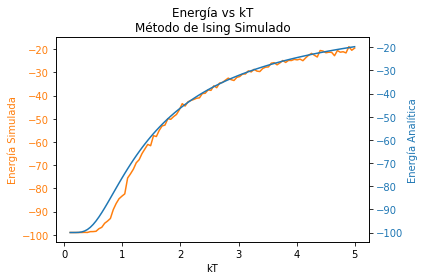

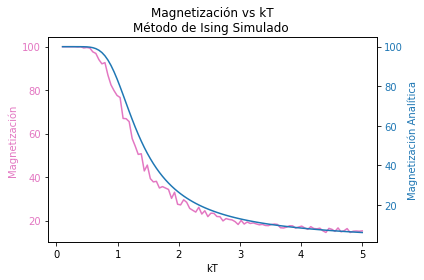

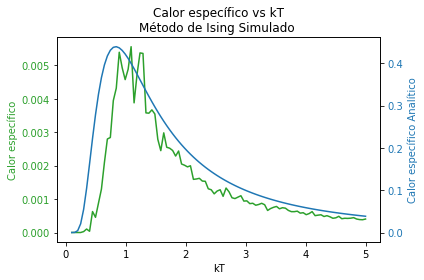

In [ ]:
#Se llama a la función del cálculo final para la configuración de espines para arriba
CalculoFinal (1)

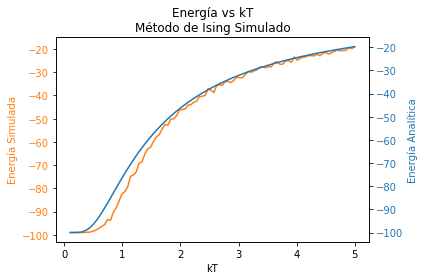

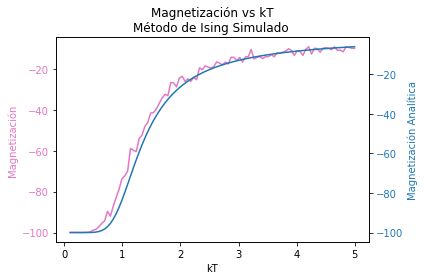

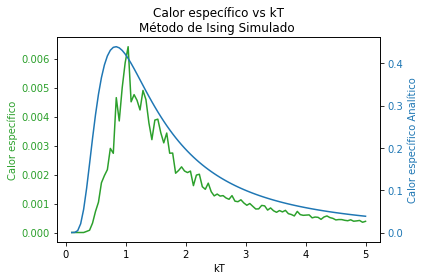

In [9]:
#Se llama a la función del cálculo final para la configuración de espines para abajo
CalculoFinal (-1)

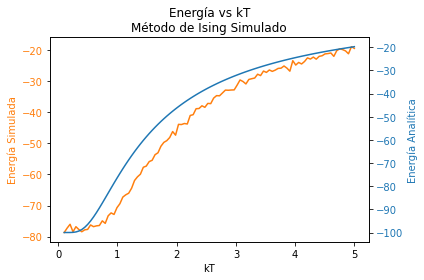

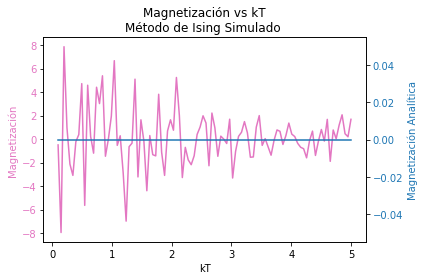

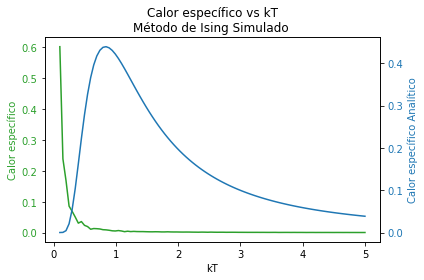

In [6]:
#Se llama a la función del cálculo final para la configuración de espines aleatorios
CalculoFinal (0)